In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
list_of_path_windows = [
    './docs/Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_утверждении_Мет.txt',
    './docs/Приказ_Минтруда_России_от_27_11_2020_N_833н_Об_утверждении.txt',
    './docs/Трудовой_кодекс_Российской_Федерации_от_30_12_2001_N_197_ФЗ_1.txt',
    './docs/Федеральный_закон_от_27_12_2002_N_184_ФЗ_ред_от_02_07_2021.txt',
    './docs/Правила_расследования_причин_аварий_в_электроэнергетике.txt',
    './docs/Инструкция_«О_мерах_пожарной_безопасности_при_проведении_огневых.txt',
    './docs/РД_34_09_105_96_Методические_указания_по_организации_учета_топлива.txt',
    './docs/РД_153_34_0_20_522_99_Типовая_инструкция_по_периодическому_техническому.txt',
    './docs/Федеральный_закон_Российской_Федерации_от_27_июля_2006_г_.txt'
]

In [3]:
def read_file(path, encoding, is_lower=False):
    list_of_paragraph = []
    with open(path, encoding=encoding) as file:
        string_buffer = ''
        regex = re.compile(r'((     |)статья |     |   |    |^)\d{1,3}\.', re.IGNORECASE)
        for line in file:
            if is_lower:
                line = line.rstrip().lower()
            else:
                line = line.rstrip()
            if regex.match(line):
                list_of_paragraph.append(string_buffer)
                string_buffer = ''
                string_buffer += line
                continue

            string_buffer += line

    return list_of_paragraph

In [4]:
list_of_docs = []
list_of_docs_lower = []

for path_to_doc in list_of_path_windows:
    list_of_docs.append(read_file(path_to_doc, 'windows-1251'))

for path_to_doc in list_of_path_windows:
    list_of_docs_lower.append(read_file(path_to_doc, 'windows-1251', True))

list_of_docs

[['Приказ Минсельхоза РФ от 31.01.2003 N 26"Об утверждении Методических рекомендаций по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях"Документ предоставлен КонсультантПлюсwww.consultant.ruДата сохранения: 14.12.2022МИНИСТЕРСТВО СЕЛЬСКОГО ХОЗЯЙСТВА РОССИЙСКОЙ ФЕДЕРАЦИИПРИКАЗот 31 января 2003 г. N 26ОБ УТВЕРЖДЕНИИ МЕТОДИЧЕСКИХ РЕКОМЕНДАЦИЙПО БУХГАЛТЕРСКОМУ УЧЕТУ МАТЕРИАЛЬНО-ПРОИЗВОДСТВЕННЫХЗАПАСОВ В СЕЛЬСКОХОЗЯЙСТВЕННЫХ ОРГАНИЗАЦИЯХ     Во исполнение Программы реформирования бухгалтерского учета в соответствии с международными стандартами финансовой отчетности и в целях разъяснения особенностей по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях приказываю:',
  '     1. Утвердить "Методические рекомендации по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях" (далее - Методические рекомендации) согласно Приложению.',
  '     2. Департаменту бухгалтерско

In [5]:
list_of_docs_lower

[['приказ минсельхоза рф от 31.01.2003 n 26"об утверждении методических рекомендаций по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях"документ предоставлен консультантплюсwww.consultant.ruдата сохранения: 14.12.2022министерство сельского хозяйства российской федерацииприказот 31 января 2003 г. n 26об утверждении методических рекомендацийпо бухгалтерскому учету материально-производственныхзапасов в сельскохозяйственных организациях     во исполнение программы реформирования бухгалтерского учета в соответствии с международными стандартами финансовой отчетности и в целях разъяснения особенностей по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях приказываю:',
  '     1. утвердить "методические рекомендации по бухгалтерскому учету материально-производственных запасов в сельскохозяйственных организациях" (далее - методические рекомендации) согласно приложению.',
  '     2. департаменту бухгалтерско

In [6]:
list_of_paragraph = []
list_of_paragraph_lower = []
with open('./ДИ.txt', encoding='utf-8') as file:
    string_buffer = ''
    regex = re.compile('^\d{1,2}\.')
    flag = True
    for line in file:
        line = line.rstrip()
        if regex.match(line):
            list_of_paragraph.append(string_buffer)
            string_buffer = ''
            string_buffer += line
            continue

        string_buffer += line

with open('./ДИ.txt', encoding='utf-8') as file:
    string_buffer = ''
    regex = re.compile('^\d{1,2}\.')
    flag = True
    for line in file:
        line = line.rstrip().lower()
        if regex.match(line):
            list_of_paragraph_lower.append(string_buffer)
            string_buffer = ''
            string_buffer += line
            continue

        string_buffer += line

list_of_paragraph[0:5]

['ДОЛЖНОСТНАЯ ИНСТРУКЦИЯ № I - 29 начальника смены топливно – транспортного цеха',
 '1. ОБЩИЕ ПОЛОЖЕНИЯ',
 '1.1. Настоящая должностная инструкция определяет функциональные обязанности, права и ответственность начальника смены ТТЦ (далее НС ТТЦ).',
 '1.2. Инструкцию обязаны знать:- начальник ТТЦ;- начальник смены электростанции (НСС);- заместитель начальника ТТЦ;- начальник смены ТТЦ.',
 '1.3. НС ТТЦ осуществляет оперативное руководство подчинённым ему оперативным персоналом смены, обеспечивающим безопасную, надёжную и экономичную эксплуатацию основного и вспомогательного оборудования, закреплённого за ТТЦ.']

In [7]:
import tensorflow_hub as hub
import tensorflow_text as text

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [8]:
%%time
main_text = embed(list_of_paragraph)
main_text

CPU times: total: 3.91 s
Wall time: 4.56 s


<tf.Tensor: shape=(170, 512), dtype=float32, numpy=
array([[ 0.04202873,  0.03845003, -0.0355386 , ..., -0.00563772,
         0.09087406,  0.02802709],
       [-0.03744918, -0.00412919, -0.01639405, ..., -0.04838863,
        -0.05748589,  0.00346918],
       [ 0.05839035,  0.00057386,  0.06335549, ..., -0.00120752,
         0.04717154, -0.09030686],
       ...,
       [ 0.01181539, -0.06354918, -0.03499488, ..., -0.05819877,
        -0.0584671 ,  0.02085528],
       [ 0.00942454,  0.00683871,  0.0317187 , ..., -0.01877169,
        -0.07948769,  0.00283729],
       [ 0.05407546,  0.0364246 , -0.02618045, ..., -0.04595441,
         0.00770608,  0.00761407]], dtype=float32)>

In [9]:
%%time
main_text_lower = embed(list_of_paragraph)
main_text_lower

CPU times: total: 1.06 s
Wall time: 1.05 s


<tf.Tensor: shape=(170, 512), dtype=float32, numpy=
array([[ 0.04202873,  0.03845003, -0.0355386 , ..., -0.00563772,
         0.09087406,  0.02802709],
       [-0.03744918, -0.00412919, -0.01639405, ..., -0.04838863,
        -0.05748589,  0.00346918],
       [ 0.05838967,  0.00057365,  0.06335573, ..., -0.00120729,
         0.04717163, -0.09030656],
       ...,
       [ 0.01181539, -0.06354918, -0.03499488, ..., -0.05819877,
        -0.0584671 ,  0.02085528],
       [ 0.00942454,  0.00683871,  0.0317187 , ..., -0.01877169,
        -0.07948769,  0.00283729],
       [ 0.05407546,  0.0364246 , -0.02618045, ..., -0.04595441,
         0.00770608,  0.00761407]], dtype=float32)>

In [19]:
%%time
list_of_embeddings = []
list_of_embeddings_lower = []
for doc in list_of_docs:
    buffer = []
    for par in doc:
        try:
            buffer.append(embed(par))
        except Exception as e:
            print(par[:100])
            print(e.with_traceback())
    list_of_embeddings.append(buffer)

for doc in list_of_docs_lower:
    buffer = []
    for par in doc:
        try:
            buffer.append(embed(par))
        except Exception as e:
            print(par[:100])
            print(e.with_traceback())
    list_of_embeddings_lower.append(buffer)

CPU times: total: 2min 13s
Wall time: 1min 22s


In [23]:
inner_array = []
final_array_lower = []
for emb in list_of_embeddings_lower:
    inner_array.append(np.inner(main_text_lower, emb))
    inner_array.append([])

for ind, arr in enumerate(inner_array):
    if len(arr) > 0:
        final_array_lower.append(pd.DataFrame(data=arr.reshape(arr.shape[0], arr.shape[1])[:, :]))
    else:
        s = pd.Series([None])
        final_array_lower.append(pd.DataFrame(s))

final_array_lower

[          0         1         2         3         4         5         6    \
 0    0.101701  0.060695  0.073652  0.132807  0.043655  0.084300  0.080410   
 1   -0.048278  0.216034  0.090972  0.074666  0.642627  0.070231  0.091881   
 2    0.035421  0.134234  0.072052  0.199897  0.087856  0.046267  0.090927   
 3    0.065792  0.179943  0.104905  0.179317  0.151446  0.066290  0.130173   
 4    0.044595  0.067750  0.033975  0.170044  0.113480  0.027088  0.073377   
 ..        ...       ...       ...       ...       ...       ...       ...   
 165  0.070779  0.173744  0.150909  0.084718  0.045780  0.101327  0.149981   
 166  0.060993  0.141293  0.152973  0.097055  0.072405  0.092918  0.137643   
 167  0.020137  0.134493  0.115772  0.075598  0.129418  0.089984  0.131934   
 168  0.089946  0.177166  0.130471  0.183792  0.231483  0.116858  0.125179   
 169  0.116600  0.246398  0.142879  0.170999  0.058767  0.117490  0.134001   
 
           7         8         9    ...       502       503   

In [24]:
inner_array = []
final_array = []
for emb in list_of_embeddings:
    inner_array.append(np.inner(main_text, emb))
    inner_array.append([])

for ind, arr in enumerate(inner_array):
    if len(arr) > 0:
        final_array.append(pd.DataFrame(data=arr.reshape(arr.shape[0], arr.shape[1])[:, :]))
    else:
        s = pd.Series([None])
        final_array.append(pd.DataFrame(s))
final_array

[          0         1         2         3         4         5         6    \
 0    0.167255  0.076069  0.062152  0.164155  0.056678  0.076732  0.084489   
 1   -0.006260  0.217152  0.108432  0.130951  0.647875  0.078468  0.107892   
 2    0.074363  0.151375  0.057041  0.201014  0.116683  0.045075  0.117172   
 3    0.138064  0.192049  0.088134  0.205550  0.169494  0.075029  0.147824   
 4    0.052118  0.075837  0.022292  0.173915  0.116325  0.022443  0.096734   
 ..        ...       ...       ...       ...       ...       ...       ...   
 165  0.070109  0.193870  0.149344  0.034141  0.059265  0.115845  0.177995   
 166 -0.000110  0.132710  0.141776  0.035968  0.087921  0.090408  0.166197   
 167  0.025611  0.132536  0.099591  0.071615  0.132932  0.074084  0.135135   
 168  0.031287  0.194551  0.131613  0.106607  0.245387  0.081696  0.133144   
 169  0.129892  0.252321  0.122309  0.145599  0.068307  0.104534  0.161572   
 
           7         8         9    ...       502       503   

In [25]:
df = pd.DataFrame(final_array[0])
df_lower = pd.DataFrame(final_array_lower[0])
df

0         1         2         3         4         5         6    \
0    0.167255  0.076069  0.062152  0.164155  0.056678  0.076732  0.084489   
1   -0.006260  0.217152  0.108432  0.130951  0.647875  0.078468  0.107892   
2    0.074363  0.151375  0.057041  0.201014  0.116683  0.045075  0.117172   
3    0.138064  0.192049  0.088134  0.205550  0.169494  0.075029  0.147824   
4    0.052118  0.075837  0.022292  0.173915  0.116325  0.022443  0.096734   
..        ...       ...       ...       ...       ...       ...       ...   
165  0.070109  0.193870  0.149344  0.034141  0.059265  0.115845  0.177995   
166 -0.000110  0.132710  0.141776  0.035968  0.087921  0.090408  0.166197   
167  0.025611  0.132536  0.099591  0.071615  0.132932  0.074084  0.135135   
168  0.031287  0.194551  0.131613  0.106607  0.245387  0.081696  0.133144   
169  0.129892  0.252321  0.122309  0.145599  0.068307  0.104534  0.161572   

          7         8         9    ...       502       503       504  \
0    0.030831  0.042691  0.052764  ...  0.079148  0.043561  0.070516   
1    0.080471  0.082863  0.023750  ...  0.006999 -0.007024 -0.022554   
2    0.090059  0.098368  0.110980  ...  0.112621  0.067307  0.058355   
3    0.014291  0.074634  0.077575  ...  0.077488  0.059085  0.045412   
4    0.086631  0.054672  0.186778  ...  0.105706  0.035053  0.046592   
..        ...       ...       ...  ...       ...       ...       ...   
165  0.138305  0.107480  0.155070  ...  0.099903  0.039316  0.261710   
166  0.162564  0.088101  0.189635  ...  0.087484  0.072443  0.173187   
167  0.099333  0.108966  0.106818  ...  0.157521  0.111785  0.162660   
168  0.146463  0.135151  0.028996  ...  0.017685  0.011475  0.073020   
169  0.149265  0.115191  0.058676  ...  0.103440  0.106213  0.075302   

          505       506       507       508       509       510       511  
0    0.074651  0.057826  0.182295  0.047677  0.028790 -0.017070 -0.037453  
1    0.059098  0.094252  0.154314  0.206499  0.189140  0.127430  0.036626  
2    0.135887  0.118846  0.088770  0.065650  0.060622  0.074090  0.000991  
3    0.128215  0.159571  0.086305  0.105803  0.107769  0.094108  0.030671  
4    0.160427  0.146283  0.120224  0.060038  0.156431  0.019170  0.085297  
..        ...       ...       ...       ...       ...       ...       ...  
165  0.231194  0.202686  0.122585 -0.004165 -0.113740  0.064253  0.089118  
166  0.218084  0.255496  0.061964 -0.038014 -0.082825  0.115294  0.123839  
167  0.296655  0.205198  0.249576  0.089762 -0.017702  0.131232  0.052980  
168  0.210972  0.176884  0.013848  0.117615 -0.001750  0.103651  0.036977  
169  0.174417  0.194788  0.049175  0.002721 -0.018811  0.072741  0.156075  

[170 rows x 512 columns]

In [26]:
for arr in final_array[1:]:
    df = df.append(arr, ignore_index=True)

for arr in final_array_lower[1:]:
    df_lower = df_lower.append(arr, ignore_index=True)

C:\Users\Yurii\AppData\Local\Temp\ipykernel_19028\3258689176.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(arr, ignore_index=True)
C:\Users\Yurii\AppData\Local\Temp\ipykernel_19028\3258689176.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lower = df_lower.append(arr, ignore_index=True)


In [27]:
df

0         1         2         3         4         5         6    \
0     0.167255  0.076069  0.062152  0.164155  0.056678  0.076732  0.084489   
1    -0.006260  0.217152  0.108432  0.130951  0.647875  0.078468  0.107892   
2     0.074363  0.151375  0.057041  0.201014  0.116683  0.045075  0.117172   
3     0.138064  0.192049  0.088134  0.205550  0.169494  0.075029  0.147824   
4     0.052118  0.075837  0.022292  0.173915  0.116325  0.022443  0.096734   
...        ...       ...       ...       ...       ...       ...       ...   
1534  0.116385  0.061745  0.054965  0.034876 -0.002268  0.049331  0.156589   
1535 -0.064873  0.046288  0.013167 -0.001034 -0.037816 -0.048188 -0.038171   
1536 -0.007330  0.182258  0.023918  0.021933  0.119804  0.063046  0.057850   
1537 -0.045031 -0.014406  0.103956  0.024914  0.052212  0.031326  0.011723   
1538       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           7         8         9    ...  520  521  522  523  524  525  526  \
0     0.030831  0.042691  0.052764  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1     0.080471  0.082863  0.023750  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2     0.090059  0.098368  0.110980  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3     0.014291  0.074634  0.077575  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4     0.086631  0.054672  0.186778  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
1534  0.062367  0.084137  0.131475  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1535 -0.015942  0.074900  0.153839  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1536  0.082724  0.035397  0.090676  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1537  0.034837  0.019239  0.081937  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1538       NaN       NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      527  528  529  
0     NaN  NaN  NaN  
1     NaN  NaN  NaN  
2     NaN  NaN  NaN  
3     NaN  NaN  NaN  
4     NaN  NaN  NaN  
...   ...  ...  ...  
1534  NaN  NaN  NaN  
1535  NaN  NaN  NaN  
1536  NaN  NaN  NaN  
1537  NaN  NaN  NaN  
1538  NaN  NaN  NaN  

[1539 rows x 530 columns]

In [28]:
df_lower

0         1         2         3         4         5         6    \
0     0.101701  0.060695  0.073652  0.132807  0.043655  0.084300  0.080410   
1    -0.048278  0.216034  0.090972  0.074666  0.642627  0.070231  0.091881   
2     0.035421  0.134234  0.072052  0.199897  0.087856  0.046267  0.090927   
3     0.065792  0.179943  0.104905  0.179317  0.151446  0.066290  0.130173   
4     0.044595  0.067750  0.033975  0.170044  0.113480  0.027088  0.073377   
...        ...       ...       ...       ...       ...       ...       ...   
1534  0.099227  0.054908  0.050528  0.016805  0.010596  0.070485  0.166618   
1535 -0.061208  0.055915  0.014294 -0.002521 -0.040899 -0.045390  0.006381   
1536  0.000769  0.146995  0.028136  0.009863  0.116700  0.073028  0.063866   
1537  0.002349 -0.035832  0.093114  0.007391  0.054499  0.032023  0.031055   
1538       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           7         8         9    ...  520  521  522  523  524  525  526  \
0     0.034220  0.037243  0.052324  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1     0.077916  0.094910  0.033669  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2     0.066879  0.093322  0.100713  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3    -0.011966  0.068851  0.064010  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4     0.070583  0.057567  0.180874  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
1534  0.051498  0.083045  0.131082  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1535  0.000625  0.078999  0.156967  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1536  0.072183  0.034316  0.088167  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1537  0.037197  0.027258  0.099359  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1538       NaN       NaN       NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      527  528  529  
0     NaN  NaN  NaN  
1     NaN  NaN  NaN  
2     NaN  NaN  NaN  
3     NaN  NaN  NaN  
4     NaN  NaN  NaN  
...   ...  ...  ...  
1534  NaN  NaN  NaN  
1535  NaN  NaN  NaN  
1536  NaN  NaN  NaN  
1537  NaN  NaN  NaN  
1538  NaN  NaN  NaN  

[1539 rows x 530 columns]

<AxesSubplot: >

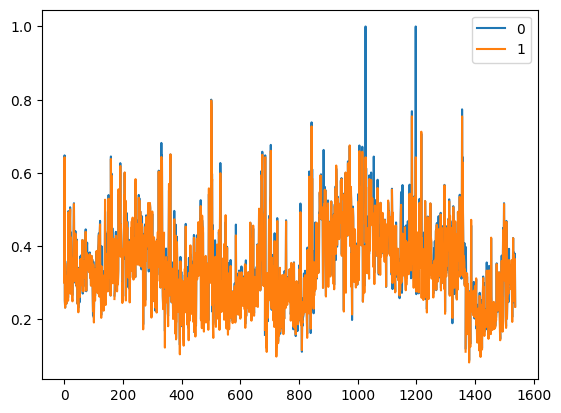

In [33]:
concat_df = pd.concat([df.max(axis=1), df_lower.max(axis=1)],axis=1)
concat_df.plot()

In [35]:
concat_df[0].mean()

0.3498744

In [38]:
concat_df[0].median()

0.3392794

In [37]:
concat_df[1].mean()

0.34275848

In [39]:
concat_df[1].median()

0.33210987

In [42]:
concat_df[(concat_df[0] > 0.34) | (concat_df[1] > 0.34)]

0         1
1     0.647875  0.642627
11    0.340643  0.339529
12    0.358577  0.353183
14    0.495556  0.492682
15    0.372388  0.362101
...        ...       ...
1519  0.348514  0.338103
1525  0.344850  0.361725
1530  0.422068  0.421882
1532  0.383282  0.376550
1536  0.379316  0.364916

[770 rows x 2 columns]

In [38]:
df.idxmax(axis=1).astype('int', errors='ignore')

0       291.0
1         4.0
2       369.0
3       163.0
4       301.0
        ...  
1534     10.0
1535     33.0
1536     51.0
1537     48.0
1538      NaN
Length: 1539, dtype: float64

In [40]:
concat_df = pd.concat([df.idxmax(axis=1), df.max(axis=1)], axis=1)
concat_df = concat_df.rename(columns={0: "ID", 1: "Value"})
concat_df

ID     Value
0     291.0  0.330462
1       4.0  1.000000
2     369.0  0.266469
3     163.0  0.250430
4     301.0  0.322949
...     ...       ...
1534   10.0  0.248659
1535   33.0  0.289289
1536   51.0  0.367814
1537   48.0  0.244215
1538    NaN       NaN

[1539 rows x 2 columns]

In [41]:
concat_df[concat_df['Value'] > 0.4]

ID     Value
1       4.0  1.000000
14    356.0  0.510712
18    310.0  0.448373
19     21.0  0.436327
20    359.0  0.526222
...     ...       ...
1455   70.0  0.427429
1496   48.0  0.451053
1499   71.0  0.453443
1507   10.0  0.520688
1530   28.0  0.454363

[446 rows x 2 columns]

In [42]:
concat_df['ID'].median()

70.0

<AxesSubplot: >

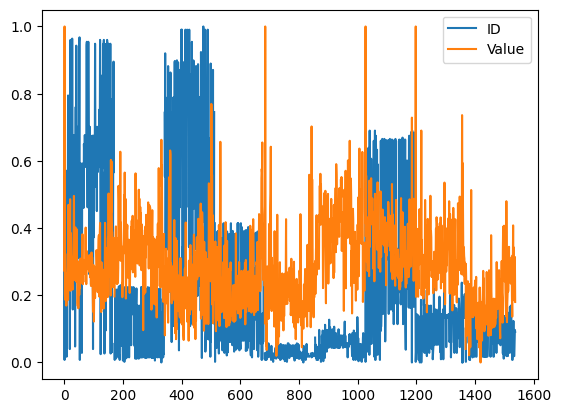

In [43]:
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(concat_df)).rename(columns={0: "ID", 1: "Value"}).plot()

In [44]:
new_df = pd.DataFrame(columns=['first_text', 'second_text', 'first_path', 'second_path'])
i = 0
j = 0

is_first_row = True
for index, row in concat_df.iterrows():
    if np.isnan(row['ID']):
        i += 2
        j += 1
        if j != len(list_of_path_windows):
            new_df.loc[len(new_df)] = [None, None, None, None]
        continue
    try:
        new_df = new_df.append(
            {
                'first_text': list_of_paragraph[(index - i) - ((len(list_of_paragraph) - 1)*j)],
                'second_text': list_of_docs[j][int(row['ID'])],
                'first_path': 'ДД.txt',
                'second_path': list_of_path_windows[j].split('/')[-1]
            },
            ignore_index=True)
    except Exception as e:
        print((index - i) - ((len(list_of_paragraph) - 1)*j))
        print(index)

final_df = pd.concat([concat_df, new_df], axis=1)
final_df

C:\Users\Yurii\AppData\Local\Temp\ipykernel_11436\3568407837.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(
C:\Users\Yurii\AppData\Local\Temp\ipykernel_11436\3568407837.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(
C:\Users\Yurii\AppData\Local\Temp\ipykernel_11436\3568407837.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(
C:\Users\Yurii\AppData\Local\Temp\ipykernel_11436\3568407837.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(
C:\Users\Yurii\AppData\Local\Temp\ipykernel_11436\3568407837.py:17: FutureWarning: The frame

ID     Value                                         first_text  \
0     291.0  0.330462  должностная инструкция № i - 29 начальника сме...   
1       4.0  1.000000                                 1. общие положения   
2     369.0  0.266469  1.1. настоящая должностная инструкция определя...   
3     163.0  0.250430  1.2. инструкцию обязаны знать:- начальник ттц;...   
4     301.0  0.322949  1.3. нс ттц осуществляет оперативное руководст...   
...     ...       ...                                                ...   
1534   10.0  0.248659  8. приказы, указания и распоряжения по тэц-5 и...   
1535   33.0  0.289289         9. положение о топливно-транспортном цехе.   
1536   51.0  0.367814              10. настоящая должностная инструкция.   
1537   48.0  0.244215  11. производственные инструкции в соответствии...   
1538    NaN       NaN                                                NaN   

                                            second_text first_path  \
0          282. документальное оформление и учет опе...     ДД.txt   
1                                    1. общие положения     ДД.txt   
2          358. распоряжения (указания) главного бух...     ДД.txt   
3          155. в конце дня или смены приемщик (клад...     ДД.txt   
4          292. производственный и хозяйственный инв...     ДД.txt   
...                                                 ...        ...   
1534  статья 5. информация как объект правовых отнош...     ДД.txt   
1535  9. установление платы за предоставление госуда...     ДД.txt   
1536             статья 11. документирование информации     ДД.txt   
1537  4. предоставление информации осуществляется в ...     ДД.txt   
1538                                                NaN        NaN   

                                            second_path  
0     Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
1     Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
2     Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
3     Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
4     Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
...                                                 ...  
1534  Федеральный_закон_Российской_Федерации_от_27_и...  
1535  Федеральный_закон_Российской_Федерации_от_27_и...  
1536  Федеральный_закон_Российской_Федерации_от_27_и...  
1537  Федеральный_закон_Российской_Федерации_от_27_и...  
1538                                                NaN  

[1539 rows x 6 columns]

In [45]:
list_of_docs[0][135]

'     128. предложения о регулировании выявленных при инвентаризации расхождений фактического наличия запасов и данных бухгалтерского учета представляются на рассмотрение руководителю организации. окончательное решение о зачете принимает руководитель организации.'

In [46]:
columns_titles = ['ID', 'Value', 'first_text', 'first_path', 'second_text', 'second_path']
final_df = final_df.reindex(columns=columns_titles)

In [47]:
final_df.head()

ID     Value                                         first_text  \
0  291.0  0.330462  должностная инструкция № i - 29 начальника сме...   
1    4.0  1.000000                                 1. общие положения   
2  369.0  0.266469  1.1. настоящая должностная инструкция определя...   
3  163.0  0.250430  1.2. инструкцию обязаны знать:- начальник ттц;...   
4  301.0  0.322949  1.3. нс ттц осуществляет оперативное руководст...   

  first_path                                        second_text  \
0     ДД.txt       282. документальное оформление и учет опе...   
1     ДД.txt                                 1. общие положения   
2     ДД.txt       358. распоряжения (указания) главного бух...   
3     ДД.txt       155. в конце дня или смены приемщик (клад...   
4     ДД.txt       292. производственный и хозяйственный инв...   

                                         second_path  
0  Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
1  Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
2  Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
3  Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...  
4  Приказ_Минсельхоза_РФ_от_31_01_2003_N_26_Об_ут...

In [48]:
with pd.ExcelWriter("embeddings.xlsx", engine="xlsxwriter") as writer:
    final_df.to_excel(writer, 'good', engine='xlsxwriter')
    sheets_good = writer.sheets['good']
    sheets_good.autofilter(0, 0, final_df.shape[0], final_df.shape[1])

    print("\nФайл создан")


Файл создан
